### Authentication and enabling GPU

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# Tensorflow is already installed in Colab
# check if tensorflow is installed
import tensorflow as tf
print(tf.__version__) 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('you must enable GPU! Go to:')
  print('\nRuntime')
  print('\tChange runtime type')
  print('\t\tHardware Accelerator: GPU')

  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.8.0
Found GPU at: /device:GPU:0


### Loading Dataset

In [ ]:
import os
import numpy as np
import os.path
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

BATCH_SIZE = 36 
NUMBER_CLASSES = 33
PATIENCE = 10
IMAGE_HEIGHT = 299
IMAGE_WIDTH = 299
EPOCH = 40

PATH_HOME = '/content/drive/Shareddrives/MIRCV/'
PATH_DATASET = '/content/drive/Shareddrives/MIRCV/dataset/preprocessed'
PATH_DATASET_PROVA = '/content/drive/Shareddrives/MIRCV/dataset/preprocessedProva'


In [ ]:
from pathlib import Path
dir = Path(PATH_DATASET)
filepaths = list(dir.glob(r'**/*.*'))

print(filepaths)

labels = [str(filepaths[i]).split("/")[-2] for i in range(len(filepaths))]
print(labels)



[PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_0.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_3.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_4.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_5.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_6.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_7.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_8.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_9.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_51.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_53.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_54.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/i

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

X = filepaths
y = labels

#X = ['path1','path2','path3','path4','path5','path6', 'path7','path8','path9','path10','path11']

#y = ['apple','apple','banana','banana','apple','apple','banana','banana','cucumber','cucumber','cucumber']

#Generate train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1234,stratify=y)



print(X_train)
print(y_train)
print(X_test)
print(y_test)

def build_pandas_dataframe(X,y):
  filepath = pd.Series(X, name='Filepath').astype(str)
  labels = pd.Series(y, name='Label')

  # Concatenate filepaths and labels
  df = pd.concat([filepath, labels], axis=1)

  # Shuffle the DataFrame and reset index
  #df = df.sample(frac=1).reset_index(drop = True) #This could be avoid because another shuffle will be done during ImgageDataGenerator.
  return df

df_train = build_pandas_dataframe(X_train,y_train)
df_test = build_pandas_dataframe(X_test,y_test)


print(df_train)
print(df_test)

[PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_56.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/raddish/img_3407.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/watermelon/img_147.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/onion/img_2271.png'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/jalapeno/img_3610.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/pear/img_239.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/turnip/img_2002.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/cauliflower/img_1582.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/grapes/img_282.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/cauliflower/img_1554.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/turnip/img_102.jpg'), PosixPath('/co

In [ ]:
df_train_group = df_train.groupby(["Label"])["Filepath"].count().reset_index(name="Count")
df_test_group = df_test.groupby(["Label"])["Filepath"].count().reset_index(name="Count")
#df2['Count'].astype(int)

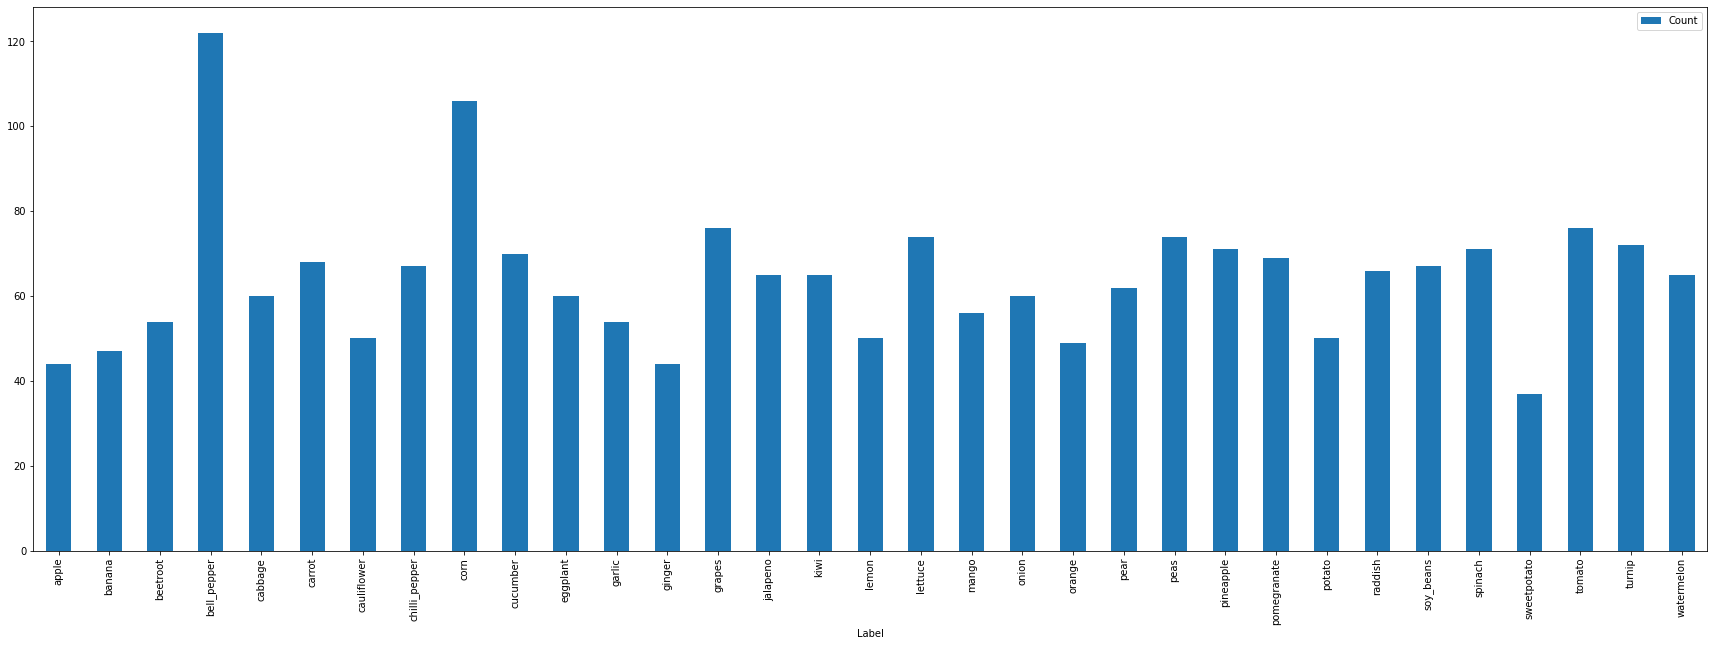

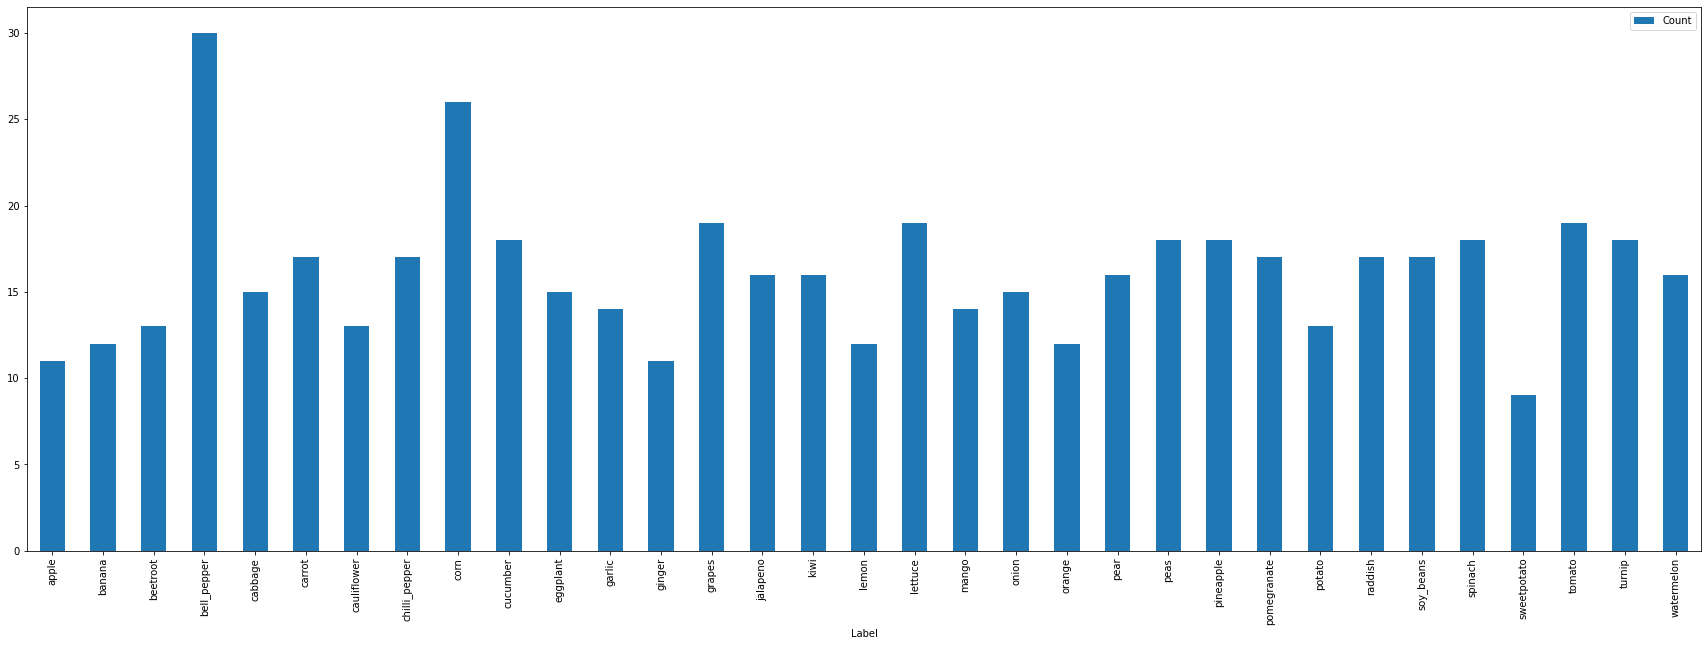

In [ ]:
# Plot experiments
#df.groupby(["item", "color"])["id"].count().reset_index(name="count")
#df.groupby(['revenue','session','user_id'])['user_id'].count()
df_train_group.plot(x='Label',y='Count', kind='bar' , figsize = (30,10))
df_test_group.plot(x='Label',y='Count', kind='bar' , figsize = (30,10))




In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagenerator = ImageDataGenerator(
       #rescale= 1. / 255.0,
       validation_split=0.20
)

test_datagenerator = ImageDataGenerator()#rescale= 1. / 255.0) 

In [ ]:
train_images = train_datagenerator.flow_from_dataframe(
    dataframe=df_train,
    x_col='Filepath',
    y_col='Label',
    subset= "training",
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=0,
)


val_images = train_datagenerator.flow_from_dataframe(
    dataframe=df_train,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    subset= "validation",
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=0,
)



test_images = test_datagenerator.flow_from_dataframe(
    dataframe=df_test,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    seed=0,
    batch_size=1,
    shuffle=False   
)

Found 1856 validated image filenames belonging to 33 classes.
Found 464 validated image filenames belonging to 33 classes.
Found 258 validated image filenames belonging to 33 classes.


In [ ]:
data_augmentation = keras.Sequential(
  [
  layers.RandomFlip("horizontal"), # Applies horizontal flipping to a random 50% of the images
  layers.RandomRotation(0.3), # Rotates the input images by a random value in the range[–30%, +30%] 
  layers.RandomZoom(0.2), # Zooms in or out of the image by a random factor in the range [-20%, +20%]
  ]
)

### Loading models

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

from keras import backend as K
K.clear_session()


conv_base = keras.applications.inception_v3.InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

conv_base.trainable = False

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = data_augmentation(inputs)
x = keras.applications.inception_v3.preprocess_input(x)
x = conv_base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(33, activation="softmax")(x)
model = keras.Model(inputs,outputs)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)

path1 = os.path.join(dir_name,'weights_ft1')
path2 = os.path.join(dir_name,'weights_ft2')

model.summary()

conv_base.trainable = False

# method B
m = tf.keras.models.clone_model(model)
m.load_weights(path1)
extractor_1 = tf.keras.models.Model(inputs=m.inputs, outputs=m.get_layer('dense').output)
#extractor_1 = tf.keras.models.Model(inputs=m.inputs, outputs=m.get_layer('global_average_pooling2d').output)

# method C
m = tf.keras.models.clone_model(model)
m.load_weights(path2)
extractor_2 = tf.keras.models.Model(inputs=m.inputs, outputs=m.get_layer('dense').output)
#extractor_2 = tf.keras.models.Model(inputs=m.inputs, outputs=m.get_layer('global_average_pooling2d').output)


#Modello base
model_base = keras.applications.inception_v3.InceptionV3(
    weights="imagenet",
    include_top=False,
    pooling = "avg",
    input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
#model_base.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 299, 299, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 299, 299, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 299, 299, 3)      0         
 a)                                                              
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0     

In [ ]:
extractor_1.summary()
extractor_2.summary()

### Generating features from models

In [ ]:
class Point:
  def __init__(self, features, img_id, label):
    self.features = features
    self.img_id = img_id
    self.label = label

   
def load_image_tf_base(path):
    image_pil = tf.keras.utils.load_img(path, target_size=input_shape,interpolation='bilinear')
    image_np = tf.keras.preprocessing.image.img_to_array(image_pil) 
    x = tf.keras.applications.inception_v3.preprocess_input(image_np)
    x = np.expand_dims(x, axis=0)
    x = np.expand_dims(image_np, axis=0)
    return x

def load_image_tf_fine_tuning(path):
    image_pil = tf.keras.utils.load_img(path, target_size=input_shape,interpolation='bilinear')
    image_np = tf.keras.preprocessing.image.img_to_array(image_pil) 
    #x = tf.keras.applications.inception_v3.preprocess_input(image_np)
    #x = np.expand_dims(x, axis=0)
    x = np.expand_dims(image_np, axis=0)
    return x

def get_featurePoints_from_images_base(paths,model,max):
  points_list = []
  i = 0
  for path in paths:
    label = str(path).split('/')[-2]
    if(label == "mirflickr"):
      label = "noise"
    img_id = str(path).split('/')[-1]
    np_img = load_image_tf_base(path)
    features = model.predict(np_img, verbose=0)
    points_list.append(Point(features, img_id, label))
    i = i + 1   
    print(i,"-Ho convertito immagine: ",img_id, "label: ", label)
    if(i == max):
      break
  return points_list


def get_featurePoints_from_images_fine_tuning(paths,model,max):
  points_list = []
  i = 0
  for path in paths:
    label = str(path).split('/')[-2]
    if(label == "mirflickr"):
      label = "noise"
    img_id = str(path).split('/')[-1]
    np_img = load_image_tf_fine_tuning(path)
    features = model.predict(np_img, verbose=0)
    points_list.append(Point(features, img_id, label))
    i = i + 1   
    print(i,"-Ho convertito immagine: ",img_id, "label: ", label)
    if(i == max):
      break
  return points_list

In [ ]:
#Questo codice potrebbe non essere eseguito alla prima: eseguirlo una seconda volta
dir = Path(PATH_HOME +'dataset/mirflickr25k/mirflickr/')
print(dir)
filepaths = list(dir.glob(r'*.jpg'))
print(len(filepaths))
noise_list = ["noise"] * len(filepaths)

print(noise_list)
print(len(noise_list))

df_mirflickr = build_pandas_dataframe(filepaths,noise_list)

print(df_mirflickr)

/content/drive/Shareddrives/MIRCV/dataset/mirflickr25k/mirflickr
25000
['noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', '

In [ ]:
frames = [df_train[:100],df_test[:100],df_mirflickr[:100]]
total_dataframe = pd.concat(frames, ignore_index=True)
input_shape = (299,299,3)
print(total_dataframe)

print(len(total_dataframe))

                                              Filepath       Label
0    /content/drive/Shareddrives/MIRCV/dataset/prep...        corn
1    /content/drive/Shareddrives/MIRCV/dataset/prep...     raddish
2    /content/drive/Shareddrives/MIRCV/dataset/prep...  watermelon
3    /content/drive/Shareddrives/MIRCV/dataset/prep...       onion
4    /content/drive/Shareddrives/MIRCV/dataset/prep...    jalapeno
..                                                 ...         ...
295  /content/drive/Shareddrives/MIRCV/dataset/mirf...       noise
296  /content/drive/Shareddrives/MIRCV/dataset/mirf...       noise
297  /content/drive/Shareddrives/MIRCV/dataset/mirf...       noise
298  /content/drive/Shareddrives/MIRCV/dataset/mirf...       noise
299  /content/drive/Shareddrives/MIRCV/dataset/mirf...       noise

[300 rows x 2 columns]
300


In [ ]:
size = len(total_dataframe)
points_base = get_featurePoints_from_images_base(total_dataframe.Filepath,model_base,size)
points_ft1 = get_featurePoints_from_images_fine_tuning(total_dataframe.Filepath,extractor_1,size)
points_ft2 = get_featurePoints_from_images_fine_tuning(total_dataframe.Filepath,extractor_2,size)

1 -Ho convertito immagine:  img_56.jpg label:  corn
2 -Ho convertito immagine:  img_3407.jpg label:  raddish
3 -Ho convertito immagine:  img_147.jpg label:  watermelon
4 -Ho convertito immagine:  img_2271.png label:  onion
5 -Ho convertito immagine:  img_3610.jpg label:  jalapeno
6 -Ho convertito immagine:  img_239.jpg label:  pear
7 -Ho convertito immagine:  img_2002.jpg label:  turnip
8 -Ho convertito immagine:  img_1582.jpg label:  cauliflower
9 -Ho convertito immagine:  img_282.jpg label:  grapes
10 -Ho convertito immagine:  img_1554.jpg label:  cauliflower
11 -Ho convertito immagine:  img_102.jpg label:  turnip
12 -Ho convertito immagine:  img_2889.jpg label:  pear
13 -Ho convertito immagine:  img_2242.jpg label:  chilli_pepper
14 -Ho convertito immagine:  img_1708.jpg label:  beetroot
15 -Ho convertito immagine:  img_2907.png label:  pear
16 -Ho convertito immagine:  img_3443.jpg label:  raddish
17 -Ho convertito immagine:  img_872.jpg label:  garlic
18 -Ho convertito immagine:  

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


174 -Ho convertito immagine:  img_2365.jpg label:  cucumber
175 -Ho convertito immagine:  img_1341.jpg label:  corn


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


176 -Ho convertito immagine:  img_2000.png label:  turnip
177 -Ho convertito immagine:  img_1378.jpg label:  lettuce
178 -Ho convertito immagine:  img_3222.jpg label:  grapes
179 -Ho convertito immagine:  img_594.jpg label:  spinach
180 -Ho convertito immagine:  img_668.jpg label:  tomato
181 -Ho convertito immagine:  img_1599.jpg label:  cauliflower
182 -Ho convertito immagine:  img_718.jpg label:  tomato
183 -Ho convertito immagine:  img_2613.jpg label:  peas
184 -Ho convertito immagine:  img_2686.jpg label:  pomegranate
185 -Ho convertito immagine:  img_1093.jpg label:  bell_pepper
186 -Ho convertito immagine:  img_143.jpg label:  watermelon
187 -Ho convertito immagine:  img_3178.jpg label:  grapes
188 -Ho convertito immagine:  img_291.jpg label:  ginger
189 -Ho convertito immagine:  img_197.jpg label:  beetroot
190 -Ho convertito immagine:  img_69.jpg label:  soy_beans
191 -Ho convertito immagine:  img_2689.jpg label:  pomegranate
192 -Ho convertito immagine:  img_1910.jpg label:  

In [ ]:
#Salvataggio dei points di training, di testing e di mirflicker
import pickle

dir = Path(PATH_HOME)
path1 = os.path.join(dir,'points_base-100-100-100.pickle')
path2 = os.path.join(dir,'points_ft1-100-100-100.pickle')
path3 = os.path.join(dir,'points_ft2-100-100-100.pickle')
with open(path1, 'wb') as handle:
    pickle.dump(points_base, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(path1, 'rb') as handle:
    b = pickle.load(handle)

with open(path2, 'wb') as handle:
    pickle.dump(points_ft1, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(path2, 'rb') as handle:
    b = pickle.load(handle)

with open(path3, 'wb') as handle:
    pickle.dump(points_ft2, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(path3, 'rb') as handle:
    b = pickle.load(handle)

In [ ]:
#load
import pickle

dir = Path(PATH_HOME)
path1 = os.path.join(dir,'points_base-100-100-100.pickle')
path2 = os.path.join(dir,'points_ft1-100-100-100.pickle')
path3 = os.path.join(dir,'points_ft2-100-100-100.pickle')

with open(path1, 'rb') as handle:
    points_base = pickle.load(handle)





In [ ]:
count = 0
for i in range(20):
  #controllo corrispondenze 
  #if((points_base[i].features == points_ft[i].features).all):
  if(np.array_equal(points_ft1[i].features, points_ft2[i].features, equal_nan=False)):
    count = count + 1
  if(i in range(0,4)):
    print(points_ft1[i].features)
    print(points_ft2[i].features)
print(count)



In [ ]:
def knn_brute_force(points,query,k,metric):
  classifica = []
  for point in points:
    distance = distanceOfTwoPoints(point,query,metric)
    tmp_point = point.copy()
    tmp_point.features = distance
    classifica.append(tmp_point)
  classifica.sort(key=lambda y: y.features)

  count=0
  for point in classifica:
    print("label: ",point.label," -img_id: ",point.img_id," -score: ",point.features)
    count += 1
    if (count==k):
      break

query = points_base[0]
k = 10
knn_brute_force(points_base,query,k,"eucledian")

AttributeError: ignored

In [ ]:
    features = []
    for elem in points_base:
      features.append(elem.features[0])

    db = normalize(features, axis=1)
    q = normalize(query.features, axis=1)
    scores = q.dot(db.T).squeeze()
    rank = scores.argsort()[::-1]  # descending order of scores
    topk = rank[:k]
    for ind in topk:
      print(points[ind].img_id, points[ind].label)
    return 0

In [ ]:
# Brutal force


# search using cosine similarity == dot product between L2-normalized vectors
db = normalize(features, axis=1)
q = normalize(query_feature, axis=1)

#db = features_ft
#q = query_feature

# search
k = 30
scores = q.dot(db.T).squeeze()
rank = scores.argsort()[::-1]  # descending order of scores
topk = rank[:k]
topk

print(features.shape)
print(query_feature.shape)


(800, 256)
(1, 256)


In [ ]:
for ind in topk:
  print(points[ind].img_id, points[ind].label)


img_3764.jpg bell_pepper
img_311.jpg bell_pepper
img_1115.jpg bell_pepper
img_1071.jpg bell_pepper
img_3831.png bell_pepper
img_1059.jpg bell_pepper
img_3772.jpg bell_pepper
img_71.jpg bell_pepper
img_3552.jpg jalapeno
img_1104.jpg bell_pepper
img_1118.jpg bell_pepper
img_3814.jpg bell_pepper
img_3844.jpg bell_pepper
img_3563.jpg jalapeno
img_3806.jpg bell_pepper
img_1066.jpg bell_pepper
img_2220.jpg chilli_pepper
img_3816.JPG bell_pepper
img_740.jpg tomato
img_3615.jpg jalapeno
img_2184.jpg chilli_pepper
img_3817.jpg bell_pepper
img_1060.png bell_pepper
img_1127.jpg bell_pepper
img_2233.jpg chilli_pepper
img_2249.jpg chilli_pepper
img_1147.jpg bell_pepper
img_2170.jpg chilli_pepper
img_3810.jpg bell_pepper
img_2599.jpg peas


In [ ]:
for ind in topk:
  print(points[ind].img_id, points[ind].label)

img_3764.jpg bell_pepper
img_311.jpg bell_pepper
img_1115.jpg bell_pepper
img_1071.jpg bell_pepper
img_3831.png bell_pepper
img_1059.jpg bell_pepper
img_3806.jpg bell_pepper
img_3844.jpg bell_pepper
img_71.jpg bell_pepper
img_3772.jpg bell_pepper
img_1104.jpg bell_pepper
img_1066.jpg bell_pepper
img_3814.jpg bell_pepper
img_1118.jpg bell_pepper
img_3816.JPG bell_pepper
img_1127.jpg bell_pepper
img_2184.jpg chilli_pepper
img_1060.png bell_pepper
img_3817.jpg bell_pepper
img_3552.jpg jalapeno
img_740.jpg tomato
img_2220.jpg chilli_pepper
img_1147.jpg bell_pepper
img_2170.jpg chilli_pepper
img_3563.jpg jalapeno
img_3581.jpg jalapeno
img_2249.jpg chilli_pepper
img_3810.jpg bell_pepper
img_3615.jpg jalapeno
img_2156.jpg chilli_pepper


In [ ]:
query_node = points[77]
rank = []
for p in points:
  rank.append(euclidean(query_node,p))

rank = scores.argsort()[::-1]  # descending order of scores
topk = rank[:k]
topk

array([348, 198,  91, 374, 112,  96,  58, 370,  54, 208])

In [ ]:
for ind in topk:
  print(points[ind].label)


bell_pepper
jalapeno
bell_pepper
jalapeno
bell_pepper
bell_pepper
bell_pepper
bell_pepper
jalapeno
bell_pepper


### Codice VPTindex

In [ ]:
from sklearn.preprocessing import normalize


A = [0.542,0.332,0.102]
B = [0.002, 0.934, 0.221]

A = np.asarray(A).reshape(1,-1)
B = np.asarray(B).reshape(1,-1)

A1 = normalize(A, axis=1)
B1 = normalize(B, axis=1)

print(A1)
print(B1)

res1 = A1.dot(B1.T).squeeze()

res2 = cosine_similarity(A,B)

print(res1)
print(res2)

[[0.84196416 0.51574188 0.15845082]]
[[0.00208378 0.97312734 0.23025818]]
0.5401215992999928
[[0.5401216]]


In [ ]:
# Brutal force usando metodo prof


# search using cosine similarity == dot product between L2-normalized vectors
only_features = []
for elem in points_base:
  only_features.append(elem.features[0])
  print(elem.features[0])

#only_features = np.asarray(only_features,axis=1).reshape(1,-1)

db = normalize(only_features, axis=1)
q = normalize(query.features, axis=1)

#db = features_ft
#q = query_feature

# search
k = 30
scores = q.dot(db.T).squeeze()
rank = scores.argsort()[::-1]  # descending order of scores
topk = rank[:k]
topk


for ind in topk:
  print(points_base[ind].img_id, points_base[ind].label)

In [ ]:
# Brutal force usando metodo cosine_similarity di sklearn


# search using cosine similarity == dot product between L2-normalized vectors
only_features = []
for elem in points_base:
  only_features.append(elem.features)
  print(elem.features)

#only_features = np.asarray(only_features,axis=1).reshape(1,-1)

#db = normalize(only_features, axis=1)
#q = normalize(query.features, axis=1)

#db = features_ft
#q = query_feature
db = np.asarray(only_features).reshape(1058,-1)
q = np.asarray(q).reshape(1,-1)
# search
k = 30
scores = cosine_similarity(db,q).squeeze()
rank = scores.argsort()[::-1]  # descending order of scores
topk = rank[:k]
topk

print(only_features.shape)
print(query_feature.shape)


In [ ]:
for ind in topk:
  print(points_base[ind].img_id, points_base[ind].label)


In [ ]:
import random
import math
import time
from sklearn.metrics.pairwise import cosine_similarity

class Point:
  def __init__(self, features, img_id, label):
    self.features = features
    self.img_id = img_id
    self.label = label

class Node:
  def __init__(self):
    self.leaf = False
    self.left = None
    self.right = None
    self.median = None
    self.mean = None
    self.pivot = None

def distanceOfTwoPoints(point1,point2,metric=""):

  if metric.lower() == "eucledian":
    result = np.sqrt(np.sum(np.square(point1.features-point2.features)))
  elif metric.lower() == "manhattan":
    result = np.sum(abs(point1.features-point2.features))
    #print("manhattan ",result, " type: ", type(result)) 
  else: #cosine similarity
    A = np.asarray(point1.features).reshape(1,-1)
    B = np.asarray(point2.features).reshape(1,-1)
    #print(A," ",B)
    #Thanks to squeeze(), we return, for istance, 0.7849372 shape () instead of a [[0.7849372]] with (1,1) of shape
    result = 1 - cosine_similarity(A,B).squeeze()  
    #print("function_cosine: ",result)
    result = np.array(result, dtype=np.float32)
    #print("function_cosine: ",result)
  return result

class Stack:
  # A list of (distance_i,class point_i)
  def __init__(self,k):
    self.size = k
    self.data = []
    self.index = 0
  
  def addElement(self,distance,point):

    if(self.isFull()):
      self.deleteLastElement()

    elem = (distance,point)
    self.data.append(elem)
    self.data.sort(key=lambda y: y[0])
    

      
  def deleteLastElement(self):
    if not self.isFull():
      print("Errore: Lista deve essere piena")
    else:
      del self.data[-1]
  
  #Pay attention in knn searching, dnn indicates the d_max of a stack
  # [(3,p4),(5,p2),(12,p5)]
  # d_max is equal to 12
  def update_d_max(self): #update dnn
    return self.data[-1][0]

  def isFull(self):
    return len(self.data) == self.size

class VPTree:

  def __init__(self, feature_schemas, bucket_size, distanceMetric):
    self.bucket_size = bucket_size
    self.feature_schemas = feature_schemas.copy()
    self.nodes = 0
    self.internalNodes = 0
    self.leafNodes = 0
    self.root = Node()
    self.totalFeatures = len(feature_schemas)
    self.distanceMetric = distanceMetric
    self.build(self.root, self.feature_schemas)


  def build(self, node, feature_subset):
    pivot = random.choice(feature_subset)
    feature_subset.remove(pivot) 

    #Nel calcolo delle distance devo escludere il vantage point
    distances = []

    #Compute distances in according to chosen pivot 
    for feature in feature_subset:   
      dist = distanceOfTwoPoints(feature,pivot,self.distanceMetric)
      #print("distance point from pivot:",dist)
      distances.append(abs(dist))

    distances = np.array(distances)
    median = np.median(distances)

    print("lista distanze:",distances)
    print("calcolo mediana:",median)
    subset1 = []
    subset2 = []

    #Split the remaining features in accoring to computed median
    for feature in feature_subset:
      dist = distanceOfTwoPoints(feature,pivot,self.distanceMetric)
      #dist = feature.features - pivot.features                       <-------
      dist = abs(dist)
      #print("dist of",feature.img_id," from ",pivot.img_id,":",dist)
      if dist <= median:
        #print("split sinistra")
        subset1.append(feature)
      else:
        #print("split destra")
        subset2.append(feature)

    node.median = median
    node.pivot = pivot
    node.left = Node()
    node.right = Node()
    self.internalNodes += 1
    self.nodes += 1

    if len(subset1) <= self.bucket_size:
      node.left.subset = subset1
      node.left.leaf = True
      self.leafNodes += 1
      self.nodes += 1
    else:
      self.build(node.left, subset1)

    if len(subset2) <= self.bucket_size:
      node.right.subset = subset2
      node.right.leaf = True
      self.leafNodes += 1
      self.nodes += 1
    else:
      self.build(node.right, subset2)
  
  def range_search(self,query,range):
    self.feature_list = []
    self.recursive_range_search(self.root,query,range)
    return self.feature_list

  def recursive_range_search(self,node,query,range):
    if node.leaf == True:
      
      for point in node.subset:
        dist = distanceOfTwoPoints(query,point,self.distanceMetric)
        #dist = query.features - point.features                       <---------
        dist = abs(dist)
        if(dist <= range):
          tmp = []
          tmp.append(point)
          tmp.append(dist)
          self.feature_list.append(tmp)
      return
    
    #We insert the pivot if it is near to the query
    dist = distanceOfTwoPoints(query,node.pivot,self.distanceMetric)
    #dist = query.features - node.pivot.features                     <----------
    dist = abs(dist)
    if(dist <= range):
      tmp = []
      tmp.append(node.pivot)
      tmp.append(dist)
      self.feature_list.append(tmp)


    if(dist - range <= node.median):
      self.recursive_range_search(node.left, query, range)
    if(dist + range >= node.median):
      self.recursive_range_search(node.right, query, range)
    return

  def knn(self, query, k):
    #global time
    start_time = time.time()
    self.knn = Stack(k)
    self.d_max = math.inf
    self.visited = 0
    self.recursive_knn(self.root, query)
    results = []

    for elem in self.knn.data:
      #print(elem)
      results.append((elem[0],elem[1])) 

    self.timeknn = time.time() - start_time
    print("Time consumed: ", self.timeknn)
    print("Visited/Total elements: ",self.visited,"/",self.totalFeatures)

    return results
  
  def recursive_knn(self,node,query):
    if node.leaf == True:
      for point in node.subset:
        self.visited += 1
        #print("--foglia")
        #print("id node: ",point.img_id)
        #print("features node: ",point.features)
        distance = distanceOfTwoPoints(query,point,self.distanceMetric)
        #distance = query.features - point.features                    <------
        distance = abs(distance)
        #print("distance: ",distance)
        #print("actual dnn: ",self.d_max)
        #print("actual knn: ",self.knn.data)
        if not self.knn.isFull():
          self.knn.addElement(distance,point)
          self.d_max = self.knn.update_d_max()
        elif distance < self.d_max:
          self.knn.addElement(distance,point)
          #remove last element inside the stack
          self.d_max = self.knn.update_d_max()
        
        print("new dnn: ",self.d_max)
        print("new knn: ",self.knn.data)
        print("-----------------------")
      return

    self.visited += 1
    #print("id node: ",node.pivot.img_id)
    #print("features node: ",node.pivot.features)
    #distance = query.features - node.pivot.features                  <-------
    distance = distanceOfTwoPoints(query,node.pivot,self.distanceMetric)
    distance = abs(distance)
    #print("distance: ",distance)
    #print("actual dnn: ",self.d_max)
    #print("actual knn: ",self.knn.data)

    if not self.knn.isFull():
      self.knn.addElement(distance,node.pivot)
      self.d_max = self.knn.update_d_max()
    elif distance < self.d_max:
      self.knn.addElement(distance,node.pivot)
      #remove last element inside the stack
      self.d_max = self.knn.update_d_max()
    #print("new dnn: ",self.d_max)
    #print("new knn: ",self.knn.data)

    if distance - self.d_max <= node.median:
      self.recursive_knn(node.left, query)
    if distance + self.d_max >= node.median:
      self.recursive_knn(node.right, query)
    return

  # function to print the tree, it will call print_tree
  def print_root(self):
      self.print_tree(self.root)

  def print_number_nodes(self):
    print("Total nodes: ", self.nodes)
    print(self.internalNodes," are Internal Nodes")
    print(self.leafNodes," are Leaf Nodes")
  # recursive function to print the tree
  def print_tree(self, node):
      if node.leaf == True:
          print("LEAF")
          print("Number of points in the node: ",len(node.subset))
          for elem in node.subset:
            print(elem.img_id)
            print(elem.features)
            print(elem.label)
          return
      else:
          print("INTERNAL")
          print("Pivot: ", node.pivot.img_id)
          print("Median: ", node.median)
          print("left")
          self.print_tree(node.left)
          print("right")
          self.print_tree(node.right)
          return

          


### Test 1

In [ ]:
#TEST 1
features = []

features.append(Point(6,"p1","prova"))
features.append(Point(8,"p2","prova"))
features.append(Point(4,"p3","prova"))
features.append(Point(3,"p4","prova"))
features.append(Point(1,"p5","prova"))
features.append(Point(6,"p6","prova"))
features.append(Point(9,"p7","prova"))
features.append(Point(12,"p8","prova"))




albero = VPTree(features,2,"Eucledian")
albero.print_number_nodes()
VPTree.print_root(albero)

dist of p1  from  p3 : 2.0
dist of p2  from  p3 : 4.0
dist of p4  from  p3 : 1.0
dist of p5  from  p3 : 3.0
dist of p6  from  p3 : 2.0
dist of p7  from  p3 : 5.0
dist of p8  from  p3 : 8.0
dist of p1  from  p5 : 5.0
dist of p4  from  p5 : 2.0
dist of p6  from  p5 : 5.0
dist of p1  from  p6 : 0.0
dist of p4  from  p6 : 3.0
dist of p2  from  p8 : 4.0
dist of p7  from  p8 : 3.0
Total nodes:  9
4  are Internal Nodes
5  are Leaf Nodes
INTERNAL
Pivot:  p3
Median:  3.0
left
INTERNAL
Pivot:  p5
Median:  5.0
left
INTERNAL
Pivot:  p6
Median:  1.5
left
LEAF
Number of points in the node:  1
p1
6
prova
right
LEAF
Number of points in the node:  1
p4
3
prova
right
LEAF
Number of points in the node:  0
right
INTERNAL
Pivot:  p8
Median:  3.5
left
LEAF
Number of points in the node:  1
p7
9
prova
right
LEAF
Number of points in the node:  1
p2
8
prova


In [ ]:
query = Point(5,"Pq","query")
lista = VPTree.range_search(albero,query,1)

for elem in lista:
  print("id: ", elem[0].img_id)
  print("features ", elem[0].features)
  print("distance from query: ", elem[1])

id:  p3
features  4
distance from query:  1.0
id:  p6
features  6
distance from query:  1.0
id:  p1
features  6
distance from query:  1.0


In [ ]:
query = Point(2,"Pq","query")
lista = VPTree.knn(albero,query,3)

print(albero.visited)
print(albero.totalFeatures)
for elem in lista:
  print("id_img: ",elem[1].img_id,"distance: ",elem[0])

### Test 2

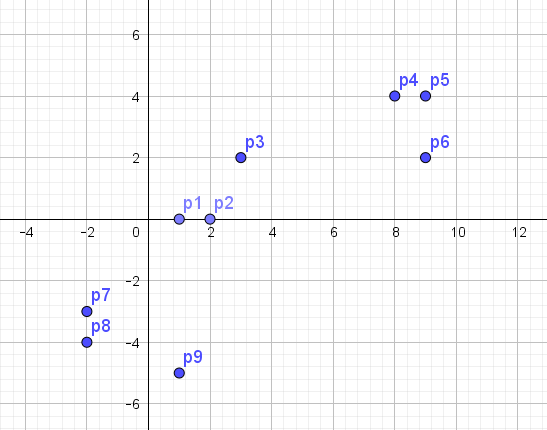

In [ ]:
#TEST 2
features = []

features.append(Point([1,0],"p1","prova"))
features.append(Point([2,0],"p2","prova"))
features.append(Point([3,2],"p3","prova"))
features.append(Point([8,4],"p4","prova"))
features.append(Point([9,4],"p5","prova"))
features.append(Point([9,2],"p6","prova"))
features.append(Point([-2,-3],"p7","prova"))
features.append(Point([-2,-4],"p8","prova"))
features.append(Point([1,-5],"p9","prova"))



import numpy as np

albero = VPTree(features,2,"cosine")
albero.print_number_nodes()
VPTree.print_root(albero)

[[1 0]]   [[-2 -4]]
function_cosine:  1.4472135954999579
function_cosine:  1.4472136
distance point from pivot: 1.4472136
[[2 0]]   [[-2 -4]]
function_cosine:  1.4472135954999579
function_cosine:  1.4472136
distance point from pivot: 1.4472136
[[3 2]]   [[-2 -4]]
function_cosine:  1.8682431421244592
function_cosine:  1.8682431
distance point from pivot: 1.8682431
[[8 4]]   [[-2 -4]]
function_cosine:  1.7999999999999998
function_cosine:  1.8
distance point from pivot: 1.8
[[9 4]]   [[-2 -4]]
function_cosine:  1.7719302356170497
function_cosine:  1.7719302
distance point from pivot: 1.7719302
[[9 2]]   [[-2 -4]]
function_cosine:  1.6305926250944658
function_cosine:  1.6305926
distance point from pivot: 1.6305926
[[-2 -3]]   [[-2 -4]]
function_cosine:  0.007722123286332372
function_cosine:  0.007722123
distance point from pivot: 0.007722123
[[ 1 -5]]   [[-2 -4]]
function_cosine:  0.21064778262367367
function_cosine:  0.21064778
distance point from pivot: 0.21064778
lista distanze: [1.4472

In [ ]:
query = Point([1,0],"p1","prova")
results = VPTree.knn(albero,query,5)

for elem in results:
  print(elem[1].img_id)

id node:  p8
features node:  [-2, -4]
[[1 0]]   [[-2 -4]]
function_cosine:  1.4472135954999579
function_cosine:  1.4472136
distance:  1.4472136
actual dnn:  inf
actual knn:  []
new dnn:  1.4472136
new knn:  [(1.4472136, <__main__.Point object at 0x7f0d59d3bed0>)]
id node:  p9
features node:  [1, -5]
[[1 0]]   [[ 1 -5]]
function_cosine:  0.803883864861816
function_cosine:  0.80388385
distance:  0.80388385
actual dnn:  1.4472136
actual knn:  [(1.4472136, <__main__.Point object at 0x7f0d59d3bed0>)]
new dnn:  1.4472136
new knn:  [(0.80388385, <__main__.Point object at 0x7f0d56ce9150>), (1.4472136, <__main__.Point object at 0x7f0d59d3bed0>)]
id node:  p2
features node:  [2, 0]
[[1 0]]   [[2 0]]
function_cosine:  0.0
function_cosine:  0.0
distance:  0.0
actual dnn:  1.4472136
actual knn:  [(0.80388385, <__main__.Point object at 0x7f0d56ce9150>), (1.4472136, <__main__.Point object at 0x7f0d59d3bed0>)]
new dnn:  1.4472136
new knn:  [(0.0, <__main__.Point object at 0x7f0d56ce9190>), (0.80388385

### Prova con immagini

In [ ]:

query = points_base[88] 
query1 = points_ft1[88]
query2 = points_ft2[88]

print(query.label)
print(query.img_id)
print(query1.label)
print(query1.img_id)
print(query2.label)
print(query2.img_id)

tomato
img_664.jpg
tomato
img_664.jpg
tomato
img_664.jpg


In [ ]:
albero_base = VPTree(points_base,10,"manhattan")
albero_ft1 = VPTree(points_ft1,10,"manhattan")
albero_ft2 = VPTree(points_ft2,10,"manhattan")

lista distanze: [468.43402 520.7864  535.8533  ... 637.6505  827.2369  764.9442 ]
calcolo mediana: 568.6636
lista distanze: [239.62552 591.94324 563.6391  542.58453 504.61105 496.8444  561.0323
 510.6282  610.9851  450.84354 584.15625 523.4728  480.3131  494.02832
 514.43353 546.1158  563.81287 612.714   564.4353  542.16614 482.03625
 566.236   507.99945 526.1155  531.913   564.92163 572.89777 500.6413
 540.2445  511.83835 466.16205 485.31558 583.10474 597.0144  521.0155
 483.5071  469.98755 530.7495  256.97244 527.1977  438.13568 225.76973
 504.81555 594.33856 450.80878 629.43896 491.7473  501.48468 561.32684
 486.56177 530.16516 456.86377 531.1786  514.4815  512.1095  472.91382
 534.82043 530.097   445.40784 341.65826 199.75336 508.614   527.62524
 558.4635  540.36523 476.3337  550.0372  587.35864 474.18918 446.54767
 509.83575 495.02658 533.9258  473.85602 569.6697  603.62366 546.00903
 546.0092  478.9973  557.6869  552.0594  472.4521  559.94806 541.9306
 488.42676 523.60785 455.558

In [ ]:
query = points_base[88] 
query1 = points_ft1[88]
query2 = points_ft2[88]


print(query.label)
print(query.img_id)
print(query1.label)
print(query1.img_id)
print(query2.label)
print(query2.img_id)

tomato
img_664.jpg
tomato
img_664.jpg
tomato
img_664.jpg


In [ ]:

results = VPTree.range_search(albero_base,query,0.50)
results1 = VPTree.range_search(albero_ft1,query1,11)
results2 = VPTree.range_search(albero_ft2,query2,11)


print(results)
#elem = (distance,point)
#self.data.append(elem)
results.sort(key=lambda y: y[1])
#results1.sort(key=lambda y: y[1])
#results2.sort(key=lambda y: y[1])

#[(point1,score),(point2,score)....] range
#[(score,point1),(score,point2)...] knn

dir = Path(PATH_DATASET)
input_shape = (299,299,3)


print("--------------------features_base--------------------")
num=1
for elem in results:
  print("n:--- ",num,"label: ", elem[0].label, "scores: ", elem[1])
  if elem[0].label == "noise" :
    dir = Path(PATH_HOME +'dataset/mirflickr25k/mirflickr/')
    img_path = os.path.join(dir,elem[0].img_id)
  else:
    dir = Path(PATH_DATASET)
    img_path = os.path.join(dir,elem[0].label,elem[0].img_id)
  #---------------------------------------
  image_pil = tf.keras.utils.load_img(img_path, target_size=input_shape)
  display(image_pil)
  num = num + 1
num=1
print("--------------------features_ft1--------------------")
for elem in results1:
  print("n:--- ",num,"label: ", elem[0].label, "scores: ", elem[1])
  if elem[0].label == "noise" :
    dir = Path(PATH_HOME +'dataset/mirflickr25k/mirflickr/')
    img_path = os.path.join(dir,elem[0].img_id)
  else:
    dir = Path(PATH_DATASET)
    img_path = os.path.join(dir,elem[0].label,elem[0].img_id)
  #---------------------------------------
  image_pil = tf.keras.utils.load_img(img_path, target_size=input_shape)
  display(image_pil)
  num = num + 1
num = 1
print("--------------------features_ft2--------------------")
for elem in results2:
  print("n:--- ",num,"label: ", elem[0].label, "scores: ", elem[1])
  if elem[0].label == "noise" :
    dir = Path(PATH_HOME +'dataset/mirflickr25k/mirflickr/')
    img_path = os.path.join(dir,elem[0].img_id)
  else:
    dir = Path(PATH_DATASET)
    img_path = os.path.join(dir,elem[0].label,elem[0].img_id)
  #---------------------------------------
  image_pil = tf.keras.utils.load_img(img_path, target_size=input_shape)
  display(image_pil)
  num = num + 1
num=1

In [ ]:

from IPython.display import Image, display
from matplotlib import pyplot as plt




input_shape = (299,299,3)


for elem in lista:
  if elem[0].label == "noise" :
    dir = Path(PATH_HOME +'dataset/mirflickr25k/mirflickr/')
    img_path = os.path.join(dir,elem[0].img_id)
  else:
    dir = Path(PATH_DATASET)
    img_path = os.path.join(dir,elem[0].label,elem[0].img_id)
  
  image_pil = tf.keras.utils.load_img(img_path, target_size=input_shape)
  display(image_pil)

In [ ]:
results = VPTree.knn(albero_base,query,20)
results1 = VPTree.knn(albero_ft1,query1,20)
results2 = VPTree.knn(albero_ft2,query2,20)

Output streaming troncato alle ultime 5000 righe.
-----------------------
new dnn:  425.3485
new knn:  [(0.0, <__main__.Point object at 0x7fabe1da1710>), (334.41257, <__main__.Point object at 0x7fabe1d3cd90>), (357.04535, <__main__.Point object at 0x7fabe1e76b50>), (357.9571, <__main__.Point object at 0x7fabe1d471d0>), (368.99295, <__main__.Point object at 0x7fabe1910410>), (379.6097, <__main__.Point object at 0x7fabe1b01d90>), (391.42584, <__main__.Point object at 0x7fabe195f990>), (394.76788, <__main__.Point object at 0x7fabe1a2c850>), (398.33887, <__main__.Point object at 0x7fab76721650>), (404.69644, <__main__.Point object at 0x7fabe195fd90>), (405.8208, <__main__.Point object at 0x7fabe18c1410>), (406.31805, <__main__.Point object at 0x7fabe180d6d0>), (406.81488, <__main__.Point object at 0x7fabe1cf1050>), (406.8629, <__main__.Point object at 0x7fab76407350>), (409.4682, <__main__.Point object at 0x7fabe1d17910>), (412.55792, <__main__.Point object at 0x7fabe1d47b90>), (413.04794,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
dir = Path(PATH_DATASET)
input_shape = (299,299,3)


print("--------------------features_base--------------------")
num=1
for elem in results:
  print("n:--- ",num,"label: ", elem[1].label, "scores: ", elem[0])
  if elem[1].label == "noise" :
    dir = Path(PATH_HOME +'dataset/mirflickr25k/mirflickr/')
    img_path = os.path.join(dir,elem[1].img_id)
  else:
    dir = Path(PATH_DATASET)
    img_path = os.path.join(dir,elem[1].label,elem[1].img_id)
  #---------------------------------------
  image_pil = tf.keras.utils.load_img(img_path, target_size=input_shape)
  display(image_pil)
  num = num + 1
num=1
print("--------------------features_ft1--------------------")
for elem in results1:
  print("n:--- ",num,"label: ", elem[1].label, "scores: ", elem[0])
  if elem[1].label == "noise" :
    dir = Path(PATH_HOME +'dataset/mirflickr25k/mirflickr/')
    img_path = os.path.join(dir,elem[1].img_id)
  else:
    dir = Path(PATH_DATASET)
    img_path = os.path.join(dir,elem[1].label,elem[1].img_id)
  #---------------------------------------
  image_pil = tf.keras.utils.load_img(img_path, target_size=input_shape)
  display(image_pil)
  num = num + 1
num = 1
print("--------------------features_ft2--------------------")
for elem in results2:
  print("n:--- ",num,"label: ", elem[1].label, "scores: ", elem[0])
  #--------------------------------
  if elem[1].label == "noise" :
    dir = Path(PATH_HOME +'dataset/mirflickr25k/mirflickr/')
    img_path = os.path.join(dir,elem[1].img_id)
  else:
    dir = Path(PATH_DATASET)
    img_path = os.path.join(dir,elem[1].label,elem[1].img_id)
  #---------------------------------------
  image_pil = tf.keras.utils.load_img(img_path, target_size=input_shape)
  display(image_pil)
  num = num + 1
num=1

Output hidden; open in https://colab.research.google.com to view.